In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
## Unpickle the data
## This is cleaned data with all features, including dummies for categorical variables.
df = pd.read_pickle('intial_data_all_features')
df.head()

,name,domestic_gross,international_gross,opening_dollars,running_time_mins,days_in_release,widest_release_in_theatres,franchise,title_length,Drama,...,Sport,Western,Not Rated,PG,PG-13,R,Unrated,Spring,Summer,Winter
0,Spider-Man: No Way Home,750429025.0,1.027000e+09,260138569.0,148,54,4336,1,23,0,...,0,0,0,0,1,0,0,0,0,1
1,Shang-Chi and the Legend of the Ten Rings,224543292.0,2.076897e+08,75388688.0,132,159,4300,1,41,0,...,0,0,0,0,1,0,0,0,0,0
2,Venom: Let There Be Carnage,213550366.0,2.885000e+08,90033210.0,97,131,4225,0,27,0,...,0,0,0,0,1,0,0,0,0,0
3,Black Widow,183651655.0,1.959797e+08,80366312.0,134,215,4275,1,11,0,...,0,0,0,0,1,0,0,0,1,0
4,F9: The Fast Saga,173005945.0,5.532236e+08,70043165.0,143,229,4203,1,17,0,...,0,0,0,0,1,0,0,0,1,0


In [3]:
df.drop_duplicates(inplace=True)
df.shape

(1071, 38)

In [4]:
## drop experiment
#df = df.drop(columns = ['domestic_gross', 'opening_dollars'])
df = df.drop(columns = ['title_length', 'Drama', 'Fantasy',
                       'Crime', 'Family', 'Romance', 'Biography', 'Horror', 'Mystery',
                       'History', 'Sport', 'War', 'Musical', 'Documentary', 'Music',
                       'Western', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Sci-Fi',
                       'Animation'])
df.head()

,name,domestic_gross,international_gross,opening_dollars,running_time_mins,days_in_release,widest_release_in_theatres,franchise,Not Rated,PG,PG-13,R,Unrated,Spring,Summer,Winter
0,Spider-Man: No Way Home,750429025.0,1.027000e+09,260138569.0,148,54,4336,1,0,0,1,0,0,0,0,1
1,Shang-Chi and the Legend of the Ten Rings,224543292.0,2.076897e+08,75388688.0,132,159,4300,1,0,0,1,0,0,0,0,0
2,Venom: Let There Be Carnage,213550366.0,2.885000e+08,90033210.0,97,131,4225,0,0,0,1,0,0,0,0,0
3,Black Widow,183651655.0,1.959797e+08,80366312.0,134,215,4275,1,0,0,1,0,0,0,1,0
4,F9: The Fast Saga,173005945.0,5.532236e+08,70043165.0,143,229,4203,1,0,0,1,0,0,0,1,0


In [5]:
## drop audience ratings
df = df.drop(columns = ['Not Rated', 'PG', 'PG-13', 'R', 'Unrated'])
df.head()

,name,domestic_gross,international_gross,opening_dollars,running_time_mins,days_in_release,widest_release_in_theatres,franchise,Spring,Summer,Winter
0,Spider-Man: No Way Home,750429025.0,1.027000e+09,260138569.0,148,54,4336,1,0,0,1
1,Shang-Chi and the Legend of the Ten Rings,224543292.0,2.076897e+08,75388688.0,132,159,4300,1,0,0,0
2,Venom: Let There Be Carnage,213550366.0,2.885000e+08,90033210.0,97,131,4225,0,0,0,0
3,Black Widow,183651655.0,1.959797e+08,80366312.0,134,215,4275,1,0,1,0
4,F9: The Fast Saga,173005945.0,5.532236e+08,70043165.0,143,229,4203,1,0,1,0


In [6]:
df.shape

(1071, 11)

In [7]:
## Separate target and other features
X = df.drop(columns = ['international_gross', 'name'])
y = df['international_gross']
y.head()

0    1.027000e+09
1    2.076897e+08
2    2.885000e+08
3    1.959797e+08
4    5.532236e+08
Name: international_gross, dtype: float64

In [8]:
## Split into train/validate/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [9]:
X_train.shape, y_train.shape

((856, 9), (856,))

In [10]:
model = LinearRegression()
reg_mod = model.fit(X_train, y_train)

In [11]:
predictions = model.predict(X_train)
mean_absolute_error(y_train, predictions)

46246162.60612488

In [12]:
model.score(X_train, y_train)

0.7235082523681069

In [13]:
model.intercept_

-109098980.37911066

In [14]:
model.coef_

array([ 1.07791258e+00,  1.08941223e+00,  9.45037910e+05,  6.15078593e+04,
       -2.44173961e+03,  2.77733468e+07,  3.92449185e+06,  1.06849014e+07,
       -1.30304204e+07])

In [15]:
lm = LinearRegression()
kf = KFold(n_splits = 5, shuffle = True, random_state = 6)
lm_cv = cross_val_score(lm, X_train, y_train, cv = kf, scoring = 'r2')
print(lm_cv)

[0.84002257 0.64998786 0.61164762 0.57071148 0.72983672]


In [16]:
lm_cv_mae = cross_val_score(lm, X_train, y_train, cv = kf, scoring = 'neg_mean_absolute_error')
print(lm_cv_mae)

[-49831729.89038265 -40774994.33499552 -51902393.69022565
 -44348437.94487047 -49137466.8013156 ]


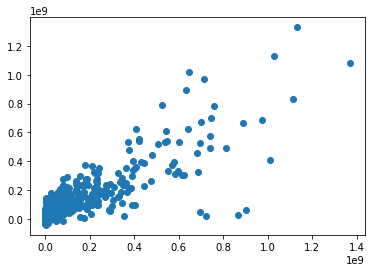

In [17]:
# Fitted vs. Actual
y_train_pred = model.predict(X_train)

plt.scatter(y_train, y_train_pred)
#plt.plot()

Text(0.5, 1.0, 'Residuals vs. Predictions')

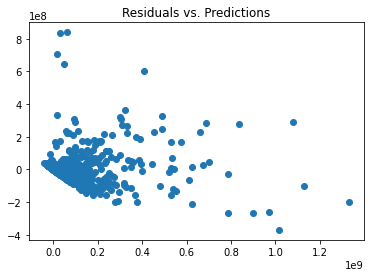

In [18]:
# Plot Residuals vs. predicted

lin_reg_residuals = y_train - y_train_pred

plt.scatter(y_train_pred, lin_reg_residuals)
plt.title("Residuals vs. Predictions")

## VIF

In [19]:
## Check VIF becasue I know from MVP that there may be some multicollinearity issues.
## Code adapted from Collinearity slides

VIF_x = X_train
VIF_x = sm.add_constant(X_train)
VIF_y = y_train
sm_model = sm.OLS(VIF_y, VIF_x)
results = sm_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     international_gross   R-squared:                       0.724
Model:                             OLS   Adj. R-squared:                  0.721
Method:                  Least Squares   F-statistic:                     246.0
Date:                 Mon, 21 Feb 2022   Prob (F-statistic):          2.99e-229
Time:                         21:06:02   Log-Likelihood:                -16891.
No. Observations:                  856   AIC:                         3.380e+04
Df Residuals:                      846   BIC:                         3.385e+04
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.091e+08   2.14e+07     -5.098      0.000   -1.51e+08   -6.71e+07
domestic_gross                 1.0779      0.123      8.753      0.000       0.836       1.320
opening_dollars                1.0894      0.384      2.835      0.005       0.335       1.844
running_time_mins            9.45e+05   1.67e+05      5.650      0.000    6.17e+05    1.27e+06
days_in_release             6.151e+04   2.66e+04      2.314      0.021    9337.061    1.14e+05
widest_release_in_theatres -2441.7396   2819.782     -0.866      0.387   -7976.328    3092.849
franchise                   2.777e+07   9.07e+06      3.062      0.002    9.97e+06    4.56e+07
Spring                      3.924e+06   9.03e+06      0.434      0.664   -1.38e+07    2.17e+07
Summer                      1.068e+07   8.67e+06      1.233      0.218   -6.33e+06    2.77e+07
Winter                     -1.303e+07   8.91e+06     -1.462      0.144   -3.05e+07    4.46e+06
==============================================================================
Omnibus:                      751.701   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30711.047
Skew:                           3.800   Prob(JB):                         0.00
Kurtosis:                      31.342   Cond. No.                     7.97e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.97e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
variables = results.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

[48.03483428470697,
 14.422995931252805,
 14.602216208738342,
 1.0860244697342285,
 1.2974396573320246,
 1.6382155309217983,
 1.4790455426840639,
 1.4609004242118782,
 1.5089509151467821,
 1.5668244085513456]

In [25]:
## Let's try Lasso since we still have a lot of features and it will eliminate some
## Code adapted from Lasso slides and Lasso exercise answers


std = StandardScaler()
std.fit(X_train.values)
## apply the scaler to the train set
X_tr = std.transform(X_train.values)
## Apply the scaler to the test set
X_te = std.transform(X_test.values)
lasso = Lasso(alpha = 10000)
lasso.fit(X_tr, y_train)
train_r_squared = lasso.score(X_tr, y_train)
#test_r_squared = lasso.score(X_te, y_test)
#print(test_r_squared)
print(train_r_squared)
print(list(zip(X_train.columns, lasso.coef_)))
print(len(list(zip(X_train.columns, lasso.coef_))))


0.7235081792536534
[('domestic_gross', 102767102.26632863), ('opening_dollars', 33331864.51040009), ('running_time_mins', 18170709.910623524), ('days_in_release', 8113248.679455509), ('widest_release_in_theatres', -3400354.864162001), ('franchise', 11486514.852776505), ('Spring', 1613633.1533601673), ('Summer', 4657090.911532996), ('Winter', -5646190.032680585)]
9


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
alphas = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphas, cv=5)
lasso_model.fit(X_tr, y_train)
r_squared_train = lasso_model.score(X_tr, y_train)
#r_squared_test = lasso_model.score(X_te, y_test)
alpha = lasso_model.alpha_

print(r_squared_train)
# print(r_squared_test)
print(alpha)


0.7235082523614613
57.38441648302393


Computing regularization path using the LARS ...


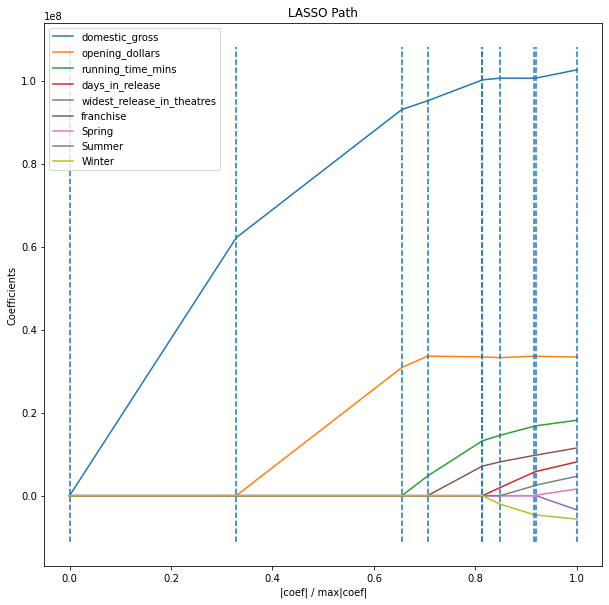

In [23]:
from sklearn.linear_model import lars_path
import matplotlib.pyplot as plt

alphas = 10**np.linspace(-2,2,200)

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()

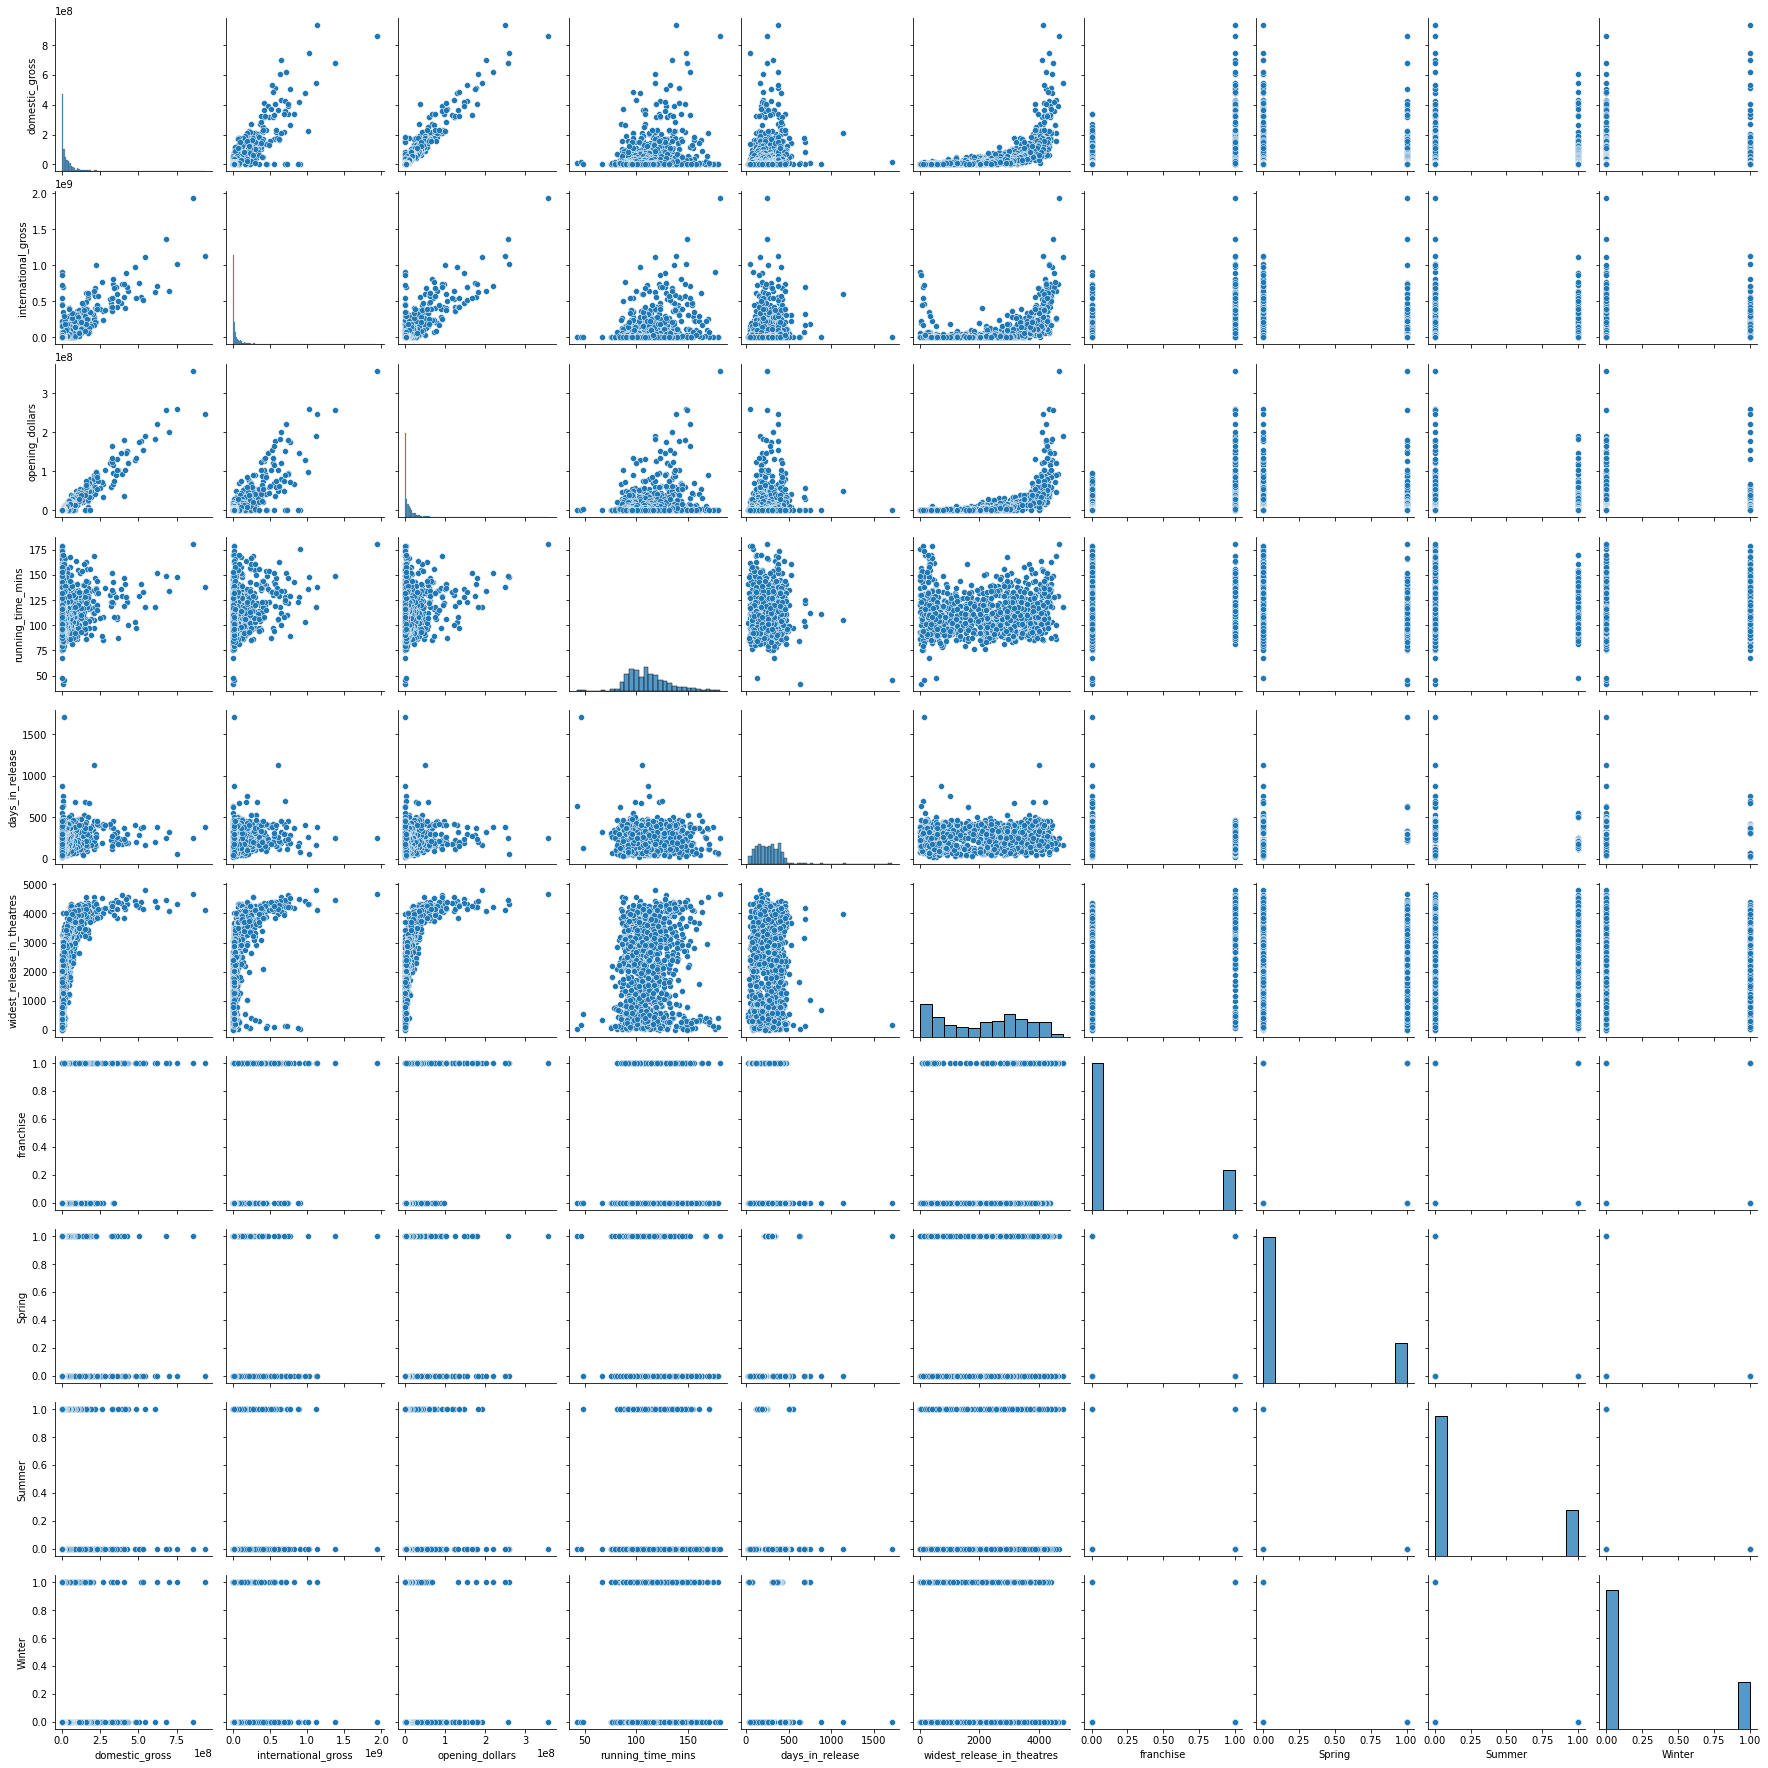

In [24]:
import seaborn as sns
sns.pairplot(df)